## PROJECT- ZOMATO API-II
#### BY: ADITI DONA

1) The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

    1.1) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

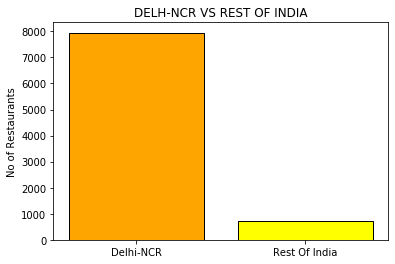

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[df['Country Code']==1] # MAKING A DF OF ONLY INDIAN RESTAURANTS(INDIA'S COUNTRY CODE=1)
ncr=np.array(['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'])
# MAKING AN ARRAY OF RESTAURANTS IN DELHI-NCR ONLY
ncr_data=np.array(df[(df.City=='New Delhi')|(df.City=='Ghaziabad')|(df.City=='Noida')|(df.City=='Gurgaon')|(df.City=='Faridabad')])
n1=len(ncr_data) # NUMBER OF RESTAURANTS IN DELHI-NCR
india_data=np.array(df) # MAKING AN ARRAY OF ALL RESTAURANTS IN INDIA
n2=len(india_data) # NUMBER OF RESTAURANTS IN INDIA
n3=n2-n1 # NUMBER OF RESTAUARANTS IN RES OF INDIS i.e. EXCLUDING DELHI-NCR
d={}
d={'Delhi-NCR':n1,'Rest Of India':n3} #MAKING A DICTIONARY OF REQUIRED DATA
plt.ylabel('No of Restaurants')
plt.title('DELH-NCR VS REST OF INDIA')
plt.bar(d.keys(),d.values(),edgecolor='black',color=['orange','yellow']) # BAR GRAPH
plt.show()

1.2) Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[df['Country Code']==1] # MAKING A DATAFRAME OF ONLY INDIAN RESTAURANTS(INDIA'S COUNTRY CODE=1)
# MAKING AN DATAFRAME OF RESTAURANTS IN DELHI-NCR ONLY
ncr_df=df[(df.City=='New Delhi')|(df.City=='Ghaziabad')|(df.City=='Noida')|(df.City=='Gurgaon')|(df.City=='Faridabad')]
ncr_cuisines=[] 
for i in ncr_df['Cuisines'].values: #MAKING A LIST OF CUISINES SERVED IN DELHI-NCR->>(ncr_cuisines)
    temp=[]
    temp=i.strip().split(',')
    for j in temp:
        ncr_cuisines.append(j.strip()) 
        
india_cuisines=[] 
temp=[]
for i in df['Cuisines'].values: # MAKING A LIST OF ALL THE CUISINES SEVERD IN INDIA->>(india_cuisines)
    temp=i.strip().split(',')
    for j in temp:
        india_cuisines.append(j.strip())
        
# USING SET DIFFERENCE TOT FIND THE CUISINES PRESENT IN india_cuisines BUT NOT IN ncr_cuisines->>(diff) 

diff=set(india_cuisines).difference(set(ncr_cuisines))
print("THE CUISINES NOT SERVED IN DELHI-NCR ACCORDING TO THE DATASET ARE",diff)

#VERIFYING FROM THE ZOMATO API 

val={'city_id':'1'}
res=req.get('https://developers.zomato.com/api/v2.1/cuisines',params=val,
            headers={'user-key':'026f719e424a24871d19aaa0b9d4da47'})
data=res.json()
temp=[]
for i in data['cuisines']:
    temp.append(i['cuisine']['cuisine_name']) # MAKING A LIST OF ALL CUISINES SERVED IN DELHI-NCR->>(temp)
temp=np.unique(temp) 
print('THE CUISINES ACTUALLY NOT SERVED IN DELHI-NCR ARE(VERIFIED FROM ZOMATO API):',end=' ')
for i in diff: # VERIFYING the answer fetched from the Dataset. 
    if i not in temp:
        print(i,end=' ')
        





THE CUISINES NOT SERVED IN DELHI-NCR ACCORDING TO THE DATASET ARE {'Malwani', 'BBQ', 'German', 'Cajun'}
THE CUISINES ACTUALLY NOT SERVED IN DELHI-NCR ARE(VERIFIED FROM ZOMATO API): German Cajun 

1.3) Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

TOP 10 MOST POPULAR CUISINES IN DELHI-NCR ARE:
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian

TOP 10 MOST POPULAR CUISINES IN REST OF INDIA ARE:
North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


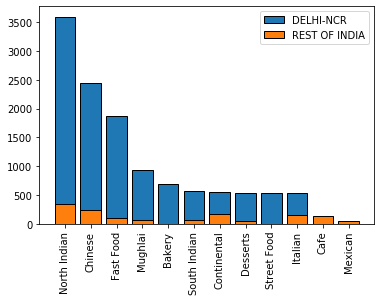

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[df.Cuisines.notnull()]
df=df[df['Country Code']==1] # MAKING A DATAFRAME OF ONLY INDIAN RESTAURANTS(INDIA'S COUNTRY CODE=1)
# MAKING AN DATAFRAME OF RESTAURANTS IN DELHI-NCR ONLY
ncr_df=df[(df.City=='New Delhi')|(df.City=='Ghaziabad')|(df.City=='Noida')|(df.City=='Gurgaon')|(df.City=='Faridabad')]

# THE FOLLOWING LINES OF CODE MAKE A DICTIONARY->(ncr_cuisines)
# which has the number of restaurants serving the respective cuisine

ncr_cuisines={}
for i in ncr_df['Cuisines'].values: #MAKING A LIST OF CUISINES SERVED IN DELHI-NCR->>(ncr_cuisines)
    temp=[]
    temp=i.strip().split(',')
    for j in temp:
        j=j.strip()
        if j not in ncr_cuisines:
            ncr_cuisines[j]=1
        else:
            ncr_cuisines[j]=ncr_cuisines.get(j,0)+1;
# Sorting the dictionary
ncr_cuisines=dict(sorted(ncr_cuisines.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 
j=0 # counter to print first 10 values in the sorted dictionary
print('TOP 10 MOST POPULAR CUISINES IN DELHI-NCR ARE:')
ncr_c=[]
ncr_val=[]
for i in ncr_cuisines:
    if j<10:
        ncr_c.append(i)
        ncr_val.append(ncr_cuisines[i])
        print(i)
        j+=1
print()
print('TOP 10 MOST POPULAR CUISINES IN REST OF INDIA ARE:') 
#---------------------------------------------------------------------------------------------------------------------------#
# THE FOLLOWING LINES OF CODE MAKE A DICTIONARY->(restofindia_cuisines)
# which has the number of restaurants serving the respective cuisine

# MAKING A DATAFRAME OF RESTAURANTS IN INDIA OTHER THAN DELHI-NCR
restofindia_df=df[(df.City!='New Delhi')&(df.City!='Ghaziabad')&(df.City!='Noida')&(df.City!='Gurgaon')&(df.City!='Faridabad')]
restofindia_cuisines={}
temp=[]
for i in restofindia_df['Cuisines'].values: 
    temp=i.strip().split(',')
    for j in temp:
        j=j.strip()
        if j not in restofindia_cuisines:
            restofindia_cuisines[j]=1
        else:
            restofindia_cuisines[j]=restofindia_cuisines.get(j,0)+1;
#SORTING THE DICTIONARY
restofindia_cuisines=dict(sorted(restofindia_cuisines.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
j=0 # counter to print first 10 value in the dictionary
restofindia_c=[]
restofindia_val=[]
for i in restofindia_cuisines:
    if j<10:
        restofindia_c.append(i)
        restofindia_val.append(restofindia_cuisines[i])
        print(i)
        j+=1
plt.bar(ncr_c,ncr_val,edgecolor='black',label='DELHI-NCR')
plt.bar(restofindia_c,restofindia_val,edgecolor='black',label='REST OF INDIA')
plt.legend()
plt.xticks(rotation=90)
plt.show()


1.4) Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

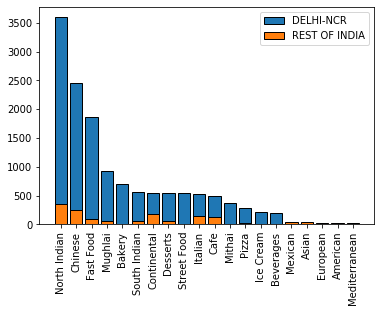

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[df.Cuisines.notnull()]
df=df[df['Country Code']==1] # MAKING A DATAFRAME OF ONLY INDIAN RESTAURANTS(INDIA'S COUNTRY CODE=1)
# MAKING AN DATAFRAME OF RESTAURANTS IN DELHI-NCR ONLY
ncr_df=df[(df.City=='New Delhi')|(df.City=='Ghaziabad')|(df.City=='Noida')|(df.City=='Gurgaon')|(df.City=='Faridabad')]

# THE FOLLOWING LINES OF CODE MAKE A DICTIONARY->(ncr_cuisines)
# which has the number of restaurants serving the respective cuisine

ncr_cuisines={}
for i in ncr_df['Cuisines'].values: #MAKING A LIST OF CUISINES SERVED IN DELHI-NCR->>(ncr_cuisines)
    temp=[]
    temp=i.strip().split(',')
    for j in temp:
        j=j.strip()
        if j not in ncr_cuisines:
            ncr_cuisines[j]=1
        else:
            ncr_cuisines[j]=ncr_cuisines.get(j,0)+1;
# Sorting the dictionary
ncr_cuisines=dict(sorted(ncr_cuisines.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 
j=0 # counter to print first 10 values in the sorted dictionary
ncr_c=[]
ncr_val=[]
for i in ncr_cuisines:
    if j<15:
        ncr_c.append(i)
        ncr_val.append(ncr_cuisines[i])
        j+=1
 
#---------------------------------------------------------------------------------------------------------------------------#
# THE FOLLOWING LINES OF CODE MAKE A DICTIONARY->(restofindia_cuisines)
# which has the number of restaurants serving the respective cuisine

# MAKING A DATAFRAME OF RESTAURANTS IN INDIA OTHER THAN DELHI-NCR
restofindia_df=df[(df.City!='New Delhi')&(df.City!='Ghaziabad')&(df.City!='Noida')&(df.City!='Gurgaon')&(df.City!='Faridabad')]
restofindia_cuisines={}
temp=[]
for i in restofindia_df['Cuisines'].values: 
    temp=i.strip().split(',')
    for j in temp:
        j=j.strip()
        if j not in restofindia_cuisines:
            restofindia_cuisines[j]=1
        else:
            restofindia_cuisines[j]=restofindia_cuisines.get(j,0)+1;
#SORTING THE DICTIONARY
restofindia_cuisines=dict(sorted(restofindia_cuisines.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
j=0 # counter to print first 10 value in the dictionary
restofindia_c=[]
restofindia_val=[]
for i in restofindia_cuisines:
    if j<15:
        restofindia_c.append(i)
        restofindia_val.append(restofindia_cuisines[i])
        j+=1
plt.bar(ncr_c,ncr_val,label='DELHI-NCR',edgecolor='black')
plt.bar(restofindia_c,restofindia_val,label='REST OF INDIA',edgecolor='black')
plt.legend()
plt.xticks(rotation=90)
plt.show()

##INFERENCE: we can see that the cuisines served in DELHI-NCR are more or less the same as those served in RESTOFINDIA, but
## as we can see the number of restaurants selling these in DELHI-NCR are much higher than those in RESTOFINDIA

2)Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

    2.1.1) Number of Votes given Restaurant

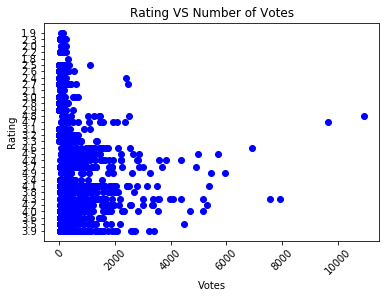

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)&(df['Aggregate rating']!=0.0)] ##DATAFRAME OF RESTAURANTS IN INDIA
votes=df['Votes'].values # LIST OF NUMBER OF VOTES OF EACH RESTAURANT
rating=df['Aggregate rating'].values # LIST OF RATING OF EACH RESTAURANT
rating=np.array(rating,dtype=str)

#PLOTTING RATING VS NO. OF VOTES
plt.scatter(votes,rating,color='blue',marker='o')
plt.title('Rating VS Number of Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

## WE INFER THAT, SINCE THE GOOD RATINGS LIKE(>4) HAVE GOT VOTES WHICH ARE BOTH <2000 AND >2000 
## HENCE,NUMBER OF VOTES DOESNT AFFECT THE RATING OF THE RESTAURANT

    2.1.2) Restaurant serving more number of cuisines.

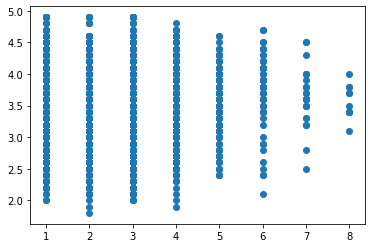

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)&(df['Aggregate rating']!=0.0)] #DATAFRAME OF ALL INDIAN RESTAURANTS ELIMATING THE ZERO RATED 
cuisine=df['Cuisines'].values #LIST->ALL CUISINES OF INDIA
rating=np.array(df['Aggregate rating'].values)

#MAKING A LIST->NUMBER OF CUISINES SERVED BY EACH RESTAURANT
num=[]
for i in df['Cuisines'].values:
    num.append(len(i.split(',')))

#PLOTTING THE SCATTER PLOT
plt.scatter(num,rating)
plt.show()

#INFERENCE: restaurants serving more cuisines or less they all have all types rating that is good(>4) or bad(<2.5). 
# Hence,rating of a restuarant doesnt depend on the number of cuisines it serves

    2.1.3) Average Cost of Restaurant

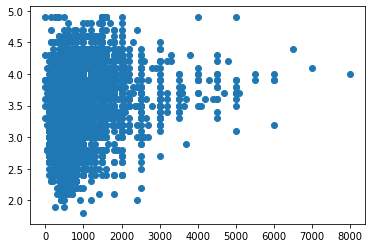

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)&(df['Aggregate rating']!=0.0)] #DATAFRAME OF ALL INDIAN RESTAURANTS ELIMATING THE ZERO RATED 
rating=df['Aggregate rating'] #LIST OF THE RATING COLUMN
avg_cost=df['Average Cost for two'] #LIST OF THE (AVG COST FOR TWO) COLUMN

#PLOTTING SCATTER PLOT
plt.scatter(avg_cost,rating)
plt.show()
#INFERENCE: AVG COST FOR 2 BEING >2500 OR <2500 WE CAN SEE THEY HAVE ALL TYPES OF RATING GOOD OR BAD.
# HENCE RATING DOESNT DEPEND ON THE AVG COST OF TWO OF THE RESTAURANT

    2.1.4) Restaurant serving some specific cuisines.

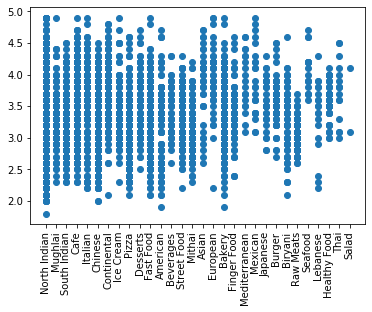

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)&(df['Aggregate rating']!=0.0)] #DATAFRAME OF ALL INDIAN RESTAURANTS ELIMATING THE ZERO RATED 
rating=df['Aggregate rating'].values #LIST OF RATING COLUMN
cuisines=df['Cuisines'].values #LIST OF CUISINES COLUMN 

#MAKING A DICTIONARY(d),KEY->Cuisine and VALUE->No.of restaurants serving these cuisines
# I AM MAKING THIS TO FIND THE POPULAR CUISINES
d={}
for i in df['Cuisines'].values: 
    temp=[]
    temp=i.strip().split(',')
    for j in temp:
        j=j.strip()
        if j not in d:
            d[j]=1
        else:
            d[j]=d.get(j,0)+1;
# SORTING THE DICTIONARY IN DECREASING ORDER
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

#MAKING A LIST(c) OF THE TOP 30 CUISINES
j=0
c=[]
for i in d:
    if j<30:
        c.append(i)
        j+=1
        
#THEN FOR ONLY THESE CUISINES I AM MAKING A LIST OF THE RATING VALUES OF EACH RESTAURANT
# EXPLAINATION: CONSIDERING NORTH INDIAN CUISINE. SO WHEREVER THIS CUISINE IS ENCOUNTERED I AM STORING ITS RATING IN->rate
cui=[]
rate=[]
temp=[]
for i in range(len(cuisines)):
    temp=cuisines[i].strip().split(',')
    for j in temp:
        if j in c:
            j=j.strip()
            cui.append(j)
            rate.append(rating[i])

#PLOTTING THE SCATTER PLOT
plt.scatter(cui,rate)
plt.xticks(rotation=90)
plt.show()

# INFERENCE: FROM THE FIRST 30 ENTRIES,LOOKING AT THE DENSITY OF THESE CUISINES WE INFERE THAT THESE CUISINES ARE SURELY
# REQUIRED FOR A RESTAURANT TO BE GOOD RATED BECAUSE THESE SEEM VERY POPULAR AMONG THE REST

2.2.1) Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

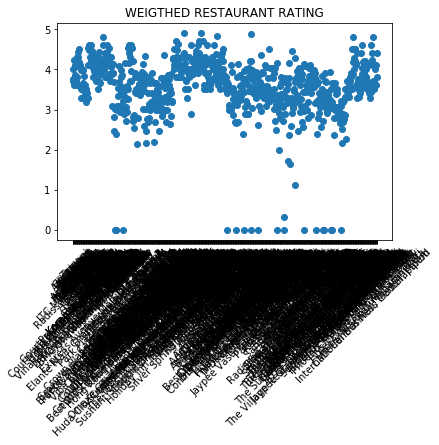

TOP 10 RESTAURANTS WITH HIGHEST WEIGHTED RESTAURANT RATING:
Hotel Clarks Amer, Malviya Nagar -- 4.90
Aminabad -- 4.90
Friends Colony -- 4.89
Powai -- 4.84
Kirlampudi Layout -- 4.82
Express Avenue Mall,  Royapettah -- 4.80
Deccan Gymkhana -- 4.80
Banjara Hills -- 4.72
Sector 5, Salt Lake -- 4.71
Riverside Mall, Gomti Nagar -- 4.70


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

##CALCULATION OF WEIGHTED RESTAURANT RATING(WRR)

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)] #INDIAN RESTAURANTS 
locality=df['Locality'].values
votes=df['Votes'].values
rating=df['Aggregate rating'].values

#Dictionary(numvotes): keys-Locality,Values-Sum of votes for each locality
numvotes={}
for i in range(len(locality)):
    if locality[i] not in numvotes:
        numvotes[locality[i]]=votes[i]
    else:
        numvotes[locality[i]]=numvotes[locality[i]]+votes[i]

#Dictionary(wrr): keys-Locality,Values-sum(rating*number_of_votes)
wrr={}
for i in range(len(locality)):
    if locality[i] not in wrr:
        wrr[locality[i]]=(rating[i]*votes[i])
    else:
        wrr[locality[i]]=wrr[locality[i]]+(rating[i]*votes[i])

#Dictionary(wrr): keys-Locality,Values-sum(rating*number_of_votes)/numvotes
a=[] #
b=[]
for i in wrr:
    if i in numvotes:
        if numvotes[i]==0: #to avoid NaN values
            wrr[i]=0
        else:
            wrr[i]=wrr[i]/numvotes[i]
            a.append(i) #used in graph plotting
            b.append(wrr[i]) #used in graph plotting
# TO SHOW THE WRR OF ALL RESTAURANTS

plt.scatter(a,b)
plt.title('WEIGTHED RESTAURANT RATING')
plt.xticks(rotation=45)
plt.show()

# TO FIND TOP 10 RESTAURANTS WITH HIGHEST WEIGHTED RESTAURANT RATING

print('TOP 10 RESTAURANTS WITH HIGHEST WEIGHTED RESTAURANT RATING:')
wrr=dict(sorted(wrr.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #sorting dictionary
j=0
for i in wrr:
    if j<10:      
        print(i,'--',"{:.2f}".format(wrr[i]))
        j+=1

# from the graph we can infer that most of the weighted restaurant. rating are in the range of 3 to 4.5

3) VISUALIZATION
    3.1) Plot the bar graph top 15 restaurants have a maximum number of outlets.

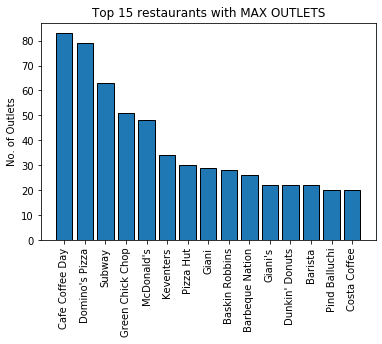

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1') 

# MKAING A DICTIONARY D(d) with key->RestaurantName,value->Number_Of_Outlets
d={}
for i in df['Restaurant Name']:
    if i not in d:
        d[i]=1
    else:
        d[i]=d[i]+1

#Sorting the dictionary to find top 15 restaurants with most number of outlets
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 
j=0
res=[] #to store RestaurantName
val=[] #Outlets
for i in d:
    if j<15:
        res.append(i)
        val.append(d[i])
        j+=1

# PLOTTING THE BAR GRAPH
plt.bar(res,val,edgecolor='black')
plt.xticks(rotation=90)
plt.title('Top 15 restaurants with MAX OUTLETS')
plt.ylabel('No. of Outlets')
plt.show()

3.2) Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

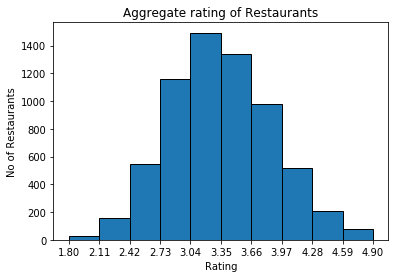

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)&(df['Aggregate rating']!=0.0)] #INDIAN RESTAURANTS EXCEPT THOSE RATED 0
rating=df['Aggregate rating']

# PLOTTING THE HISTOGRAM
plt.hist(rating,edgecolor='black')
a=np.arange(1.8,5.1,.31)
plt.xticks(a)
plt.title('Aggregate rating of Restaurants')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
plt.show()

3.3) Plot the bar graph top 10 restaurants in the data with the highest number of votes.

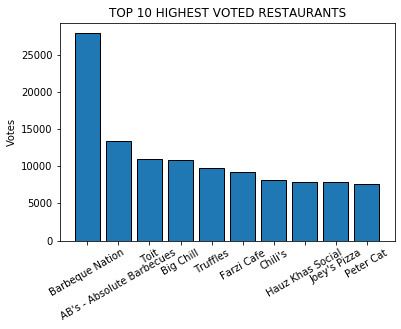

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)] #INDIAN RESTAURANTS
votes=df['Votes'].values
res=df['Restaurant Name'].values

# MAKING A DICTIONARY(d) KEYS->RESTAURANTNAME,VALUE->NUMBER OF VOTES
d={}
for i in range(len(votes)):
    if res[i] not in d:
        d[res[i]]=votes[i]
    else:
        d[res[i]]=d[res[i]]+votes[i]
        
#SORTING THE DICTIONARY
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #sorting dictionary

j=0 #COUNTER TO MAKE A LIST OF TOP 10 RESTAURANTS AND THEIR VOTES FOR PLOTTING
res=[] #RESNAME
votes=[] #VOTES
for i in d:
    if j<10:
        res.append(i)
        votes.append(d[i])
        j+=1
        
#PLOTTING BAR GRAPH
plt.bar(res,votes,edgecolor='black')
plt.title('TOP 10 HIGHEST VOTED RESTAURANTS')
plt.ylabel('Votes')
plt.xticks(rotation=30)
plt.show()



3.4) Plot the pie graph of top 10 cuisines present in restaurants in the USA.

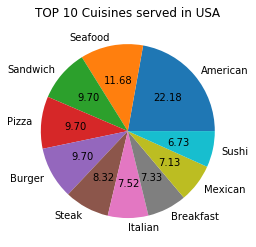

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[df['Cuisines'].notnull()] 
df=df[(df['Country Code']==216)] #RESTAURANTS OF USA

#MAKING A DICTIONARY(d),KEY->Cuisine and VALUE->No.of restaurants serving these cuisines
# I AM MAKING THIS TO FIND THE POPULAR CUISINES
d={}
temp=[]
for i in df['Cuisines'].values:
    temp=i.split(',')
    for j in temp:
        j=j.strip()
        if j not in d:
            d[j]=1
        else:
            d[j]=d.get(j,0)+1;

            #SORTING THE DICTIONARY
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

j=0 #COUNTER TO MAKE A LIST OF TOP 10 CUISINES AND THE NUMBER OF RESTAURANTS WHERE ITS SERVED FOR PLOTTING
cui=[] #CUISINES
num=[] #NUMBER OF RESTAURANTS SERVINF CUISINE
for i in d:
    if j<10:
        cui.append(i)
        num.append(d[i])
        j+=1 

#PLOTTING PIE CHART
plt.pie(num,labels=cui,autopct='%.2f')
plt.title('TOP 10 Cuisines served in USA')
plt.show(

3.5) Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.


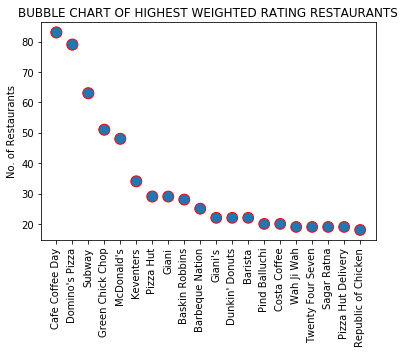

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import csv

df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[(df['Country Code']==1)] 
locality=df['Locality'].values
votes=df['Votes'].values
rating=df['Aggregate rating'].values

#Dictionary(numvotes): keys-Locality,Values-Sum of votes for each locality
numvotes={}
for i in range(len(locality)):
    if locality[i] not in numvotes:
        numvotes[locality[i]]=votes[i]
    else:
        numvotes[locality[i]]=numvotes[locality[i]]+votes[i]
        
#Dictionary(wrr): keys-Locality,Values-sum(rating*number_of_votes)
wrr={}
for i in range(len(locality)):
    if locality[i] not in wrr:
        wrr[locality[i]]=(rating[i]*votes[i])
    else:
        wrr[locality[i]]=wrr[locality[i]]+(rating[i]*votes[i])
        
#Dictionary(wrr): keys-Locality,Values-sum(rating*number_of_votes)/numvotes
for i in wrr:
    if i in numvotes:
        if numvotes[i]==0: #to avoid NaN values
            wrr[i]=0
        else:
            wrr[i]=round((wrr[i]/numvotes[i]),2)
            
#sorting dictionary
wrr=dict(sorted(wrr.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

#SINCE THE BUBBLE CHART IS THE THIRD PARAMETER, TO PLOT THIS I NEED TWO OTHER PARAMETERS
#FOR THAT I AMKING A DICTIONARY(d) KEY->RESTAURANTNAME,VALUE->NUMBER OF OUTLETS
#AND THESE THE OTHER TWO PARAMETERS
d={}
for i in df['Restaurant Name']:
    if i not in d:
        d[i]=1
    else:
        d[i]=d[i]+1
d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #sorting dictionary

a=[] #RESNAME
b=[] #OUTLETS
j=0
for i in d:
    if j<20:      
        a.append(i)
        b.append(d[i])
        j+=1

#STORING THE TOP 20 HIGHEST WEIGHTED RATING RESTAURANTS IN (wr) TO PASS AS THE SIZE OF THE BUBBLE
wr=[]
j=0 #counter
for i in wrr:
    if j<20:
        wr.append(wrr[i])
        j+=1
#SINCE THE VALUES OF THE WRR ARE VERY CLOSE
wr=np.array(wr)
wr=wr*25 #HENCE MULTIPLYING EACH WR TO MAKE THE BUBBLE DISTINGUISHABLE

#PLOTIING THE BUBBLE CHART
plt.scatter(a,b,s=wr,edgecolor='r')
wr=np.array(wr,dtype=float)
plt.xticks(rotation=90)
plt.title('BUBBLE CHART OF HIGHEST WEIGHTED RATING RESTAURANTS')
plt.ylabel('No. of Restaurants')
plt.show()